# Customizing Plot legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the plt.legend() command, which automatically creates a legend for any labeled plot elements:


In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

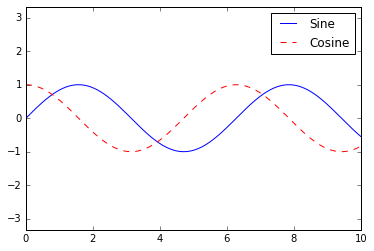

In [8]:
x = np.linspace(0 , 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
legend = ax.legend()

We can customize the legend in many ways

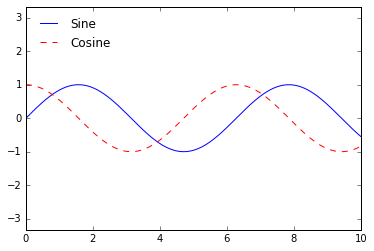

In [10]:
ax.legend(loc='upper left', frameon=False)
fig

ncol command specifies the number of columns in the legend

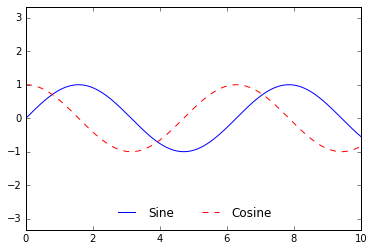

In [12]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (fancybox)

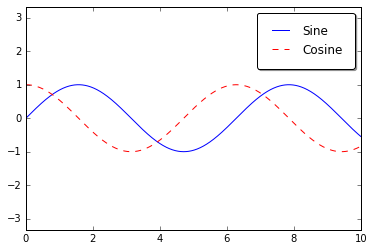

In [14]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

# Choosing Elements for the legend
As we have already seen, the legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to plt.legend() will tell it which to identify, along with the labels we'd like to specify:

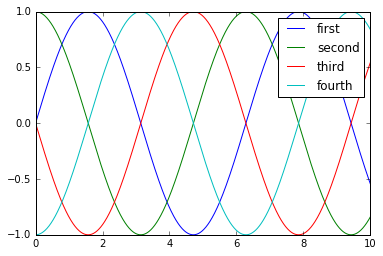

In [21]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.line2D instances
plt.legend(lines[:5], ['first', 'second', 'third', 'fourth', 'p']) # So I added a 5th element, but there isn't one.

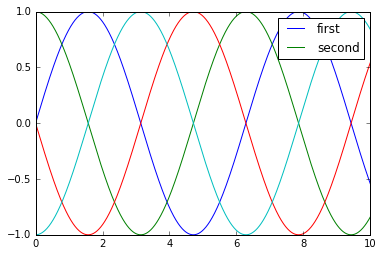

In [16]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

# Legend for a Size of Points

Sometimes the legend defaults are not sufficient for the given visualization. For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this. Here is an example where we'll use the size of points to indicate populations of California cities. We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

In [30]:
import pandas as pd

    
#!curl -O https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv
cities = pd.read_csv('california_cities.csv')


 Volume in drive C is OS
 Volume Serial Number is DA6E-4B74

 Directory of C:\Users\ElPanda\onedrive\visualization_with_matplotlib

02/21/2017  10:16 PM    <DIR>          .
02/21/2017  10:16 PM    <DIR>          ..
02/21/2017  09:02 PM    <DIR>          .ipynb_checkpoints
02/19/2017  09:34 PM           164,543 1. Simple Line Plots.ipynb
02/20/2017  01:47 PM           196,403 2. Simple Scatter Plots.ipynb
02/20/2017  10:12 PM            45,237 3. Visualizing Errors.ipynb
02/20/2017  11:05 PM           495,945 4. Density and Contour Plots.ipynb
02/21/2017  09:01 PM           123,552 5. Histograms, Binnings, and Density.ipynb
02/21/2017  10:16 PM            59,658 california_cities.csv
02/21/2017  10:16 PM           152,840 Customizing Plot legends.ipynb
02/19/2017  09:08 PM            16,770 my_figure.png
02/18/2017  11:14 PM                32 README.md
               9 File(s)      1,254,980 bytes
               3 Dir(s)  185,321,418,752 bytes free
